In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

Part 1: Implement the model as a stochastic simulator using the Euler-Maruyama method, verify that
your implementation can generate reasonably looking response times distributions for two,
three, and four alternatives

In [191]:
def simulate_ffi(v, a, x0, tau, alpha, dt=0.001, scale=1., max_time=20.):
    '''
    Simulates one realization of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    v : np.ndarray of shape (N, ), float
        The drift rates.
    a : float
        The boundary separation.
    x0 : np.ndarray of shape (N, ), float 
         Relative starting points.
    tau : float
          Non-decision time (additive constant).
    alpha : float > 0
            The strenth of feedforward inhibition.
    dt : float, optional (default: 1e-3 = 0.001)
         The step size for Euler algorithm.
    scale : float, optional (default: 1.0)
            The scale of the Weiner process. Either 1.0 or 0.1 normally.
    max_time : float, optional (default: 10)
               The maximum number of seconds before forced termination.
            
    Returns:
    --------------
    (y, c) : a tuple of response time (y : float) and a decision (c : int)
    '''

    #Inits (process starts at a relative starting point)
    assert v.shape[0] == x0.shape[0]
    N = v.size
    x = np.copy(x0)
    rt = tau
    const = scale*np.sqrt(dt)

    #Loop through process and check boundary conditions
    while(rt <= max_time):
        #Sample random noise variate
        z = np.random.randn(N)

        for i in range(N):
            #Perform ffi equation
            I = (alpha / (N - 1)) * (np.sum(v) - v[i])
            dx_i = (v[i] - I)*dt + const*z[i]
            x[i] = max(x[i] + dx_i, 0)

        #Compute time
        rt += dt

        #Check if decision was reached
        if(any(x >= a)):
            break
                
    #Return result
    return (round(rt, 3), x.argmax())

def simulate_ffi_n(num_sims, v, a, x0, tau, alpha, dt=0.001, scale=1.,max_time=20.):
    '''
    Simulates multiple realizations of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    num_sims : int
               The number of simulations to run.
    v : np.ndarray of shape (N, ), float
        The drift rates.
    a : float
        The boundary separation.
    x0 : np.ndarray of shape (N, ), float 
         Relative starting points.
    tau : float
          Non-decision time (additive constant).
    alpha : float > 0
            The strenth of feedforward inhibition.
    dt : float, optional (default: 1e-3 = 0.001)
         The step size for Euler algorithm.
    scale : float, optional (default: 1.0)
            The scale of the Weiner process. Either 1.0 or 0.1 normally.
    max_time : float, optional (default: 10)
               The maximum number of seconds before forced termination.
            
    Returns:
    --------------
    data : np.ndarray of shape (N, ) containing the result of the simulations
    '''

    data = np.zeros((num_sims, 2))
    for n in range(num_sims):
        data[n, :] = simulate_ffi(v, a, x0, tau, alpha, dt, scale, max_time)
    return data

def visualize_ffi(data, parameters, colors, figsize=(8, 6)):
    assert parameters['v'].shape[0] == len(colors)
    f, ax = plt.subplots(1, 1, figsize=figsize)
    for i in range(parameters['v'].shape[0]):
        sns.histplot(data[:, 0][data[:, 1] == i], color=colors[i], alpha=0.7, ax=ax, label=f'Alternative {i}')
        sns.despine(ax=ax)
        ax.set_xlabel("Response time (s)", fontsize=18)
        ax.set_ylabel("")
        ax.legend(fontsize=18)
        ax.set_yticks([])
        f.tight_layout
    return f

In [88]:
#Test out 2, 3, and 4 alternatives
parameters1 = {
    'v': np.array([1., 1.]),
    'a': 2.,
    'x0': np.array([0.001, 0]),
    'tau': 0.5,
    'alpha': 0.5
}

parameters2 = {
    'v': np.array([1., 1., 1.]),
    'a': 2.,
    'x0': np.array([0.001, 0, 0]),
    'tau': 0.5,
    'alpha': 0.5
}

parameters3 = {
    'v': np.array([1., 1., 1., 1.]),
    'a': 2.,
    'x0': np.array([0.001, 0, 0, 0]),
    'tau': 0.5,
    'alpha': 0.5
}

In [89]:
data1 = simulate_ffi_n(200, **parameters1)
data2 = simulate_ffi_n(200, **parameters2)
data3 = simulate_ffi_n(200, **parameters3)

In [90]:
data1

array([[1.696, 1.   ],
       [1.182, 0.   ],
       [1.228, 1.   ],
       [1.134, 0.   ],
       [1.729, 0.   ],
       [1.772, 0.   ],
       [1.339, 1.   ],
       [0.944, 1.   ],
       [4.609, 0.   ],
       [2.278, 0.   ],
       [1.216, 0.   ],
       [1.693, 0.   ],
       [1.686, 0.   ],
       [2.148, 1.   ],
       [2.704, 1.   ],
       [1.238, 1.   ],
       [2.388, 0.   ],
       [1.358, 1.   ],
       [1.65 , 1.   ],
       [1.872, 1.   ],
       [2.042, 1.   ],
       [1.466, 1.   ],
       [1.395, 0.   ],
       [2.203, 0.   ],
       [1.982, 1.   ],
       [1.891, 0.   ],
       [1.645, 1.   ],
       [1.47 , 0.   ],
       [0.94 , 1.   ],
       [1.824, 1.   ],
       [1.973, 1.   ],
       [2.073, 1.   ],
       [2.163, 1.   ],
       [1.515, 0.   ],
       [3.034, 0.   ],
       [1.828, 0.   ],
       [1.124, 0.   ],
       [0.959, 0.   ],
       [2.518, 1.   ],
       [1.301, 1.   ],
       [2.139, 1.   ],
       [2.099, 1.   ],
       [1.817, 1.   ],
       [2.7

In [91]:
data2

array([[1.373, 2.   ],
       [1.368, 2.   ],
       [2.498, 0.   ],
       [1.137, 0.   ],
       [1.12 , 2.   ],
       [1.512, 2.   ],
       [1.715, 0.   ],
       [1.629, 1.   ],
       [1.406, 2.   ],
       [1.665, 2.   ],
       [1.598, 2.   ],
       [0.907, 0.   ],
       [1.632, 2.   ],
       [1.337, 0.   ],
       [2.463, 1.   ],
       [1.32 , 1.   ],
       [0.99 , 2.   ],
       [1.19 , 2.   ],
       [1.211, 1.   ],
       [2.106, 1.   ],
       [2.493, 0.   ],
       [1.712, 1.   ],
       [0.831, 1.   ],
       [2.438, 2.   ],
       [0.975, 0.   ],
       [1.635, 0.   ],
       [2.043, 0.   ],
       [1.143, 1.   ],
       [2.063, 0.   ],
       [1.437, 2.   ],
       [1.377, 0.   ],
       [2.39 , 2.   ],
       [0.983, 0.   ],
       [1.662, 0.   ],
       [1.61 , 0.   ],
       [1.301, 2.   ],
       [1.677, 2.   ],
       [1.025, 2.   ],
       [1.711, 2.   ],
       [2.034, 1.   ],
       [2.176, 2.   ],
       [1.322, 2.   ],
       [1.272, 1.   ],
       [0.8

In [92]:
data3

array([[2.143, 3.   ],
       [1.191, 1.   ],
       [1.765, 3.   ],
       [1.943, 3.   ],
       [2.109, 2.   ],
       [1.225, 0.   ],
       [1.426, 3.   ],
       [2.264, 3.   ],
       [1.401, 0.   ],
       [1.445, 1.   ],
       [1.603, 3.   ],
       [2.025, 1.   ],
       [2.255, 3.   ],
       [1.543, 0.   ],
       [1.389, 1.   ],
       [1.267, 1.   ],
       [1.996, 2.   ],
       [1.249, 0.   ],
       [1.531, 0.   ],
       [1.148, 2.   ],
       [1.933, 2.   ],
       [1.767, 1.   ],
       [1.365, 3.   ],
       [1.323, 3.   ],
       [1.983, 0.   ],
       [2.088, 1.   ],
       [1.401, 0.   ],
       [0.949, 2.   ],
       [2.492, 1.   ],
       [2.015, 0.   ],
       [1.677, 2.   ],
       [1.523, 2.   ],
       [0.922, 3.   ],
       [1.114, 1.   ],
       [1.42 , 0.   ],
       [1.573, 3.   ],
       [2.154, 1.   ],
       [1.267, 0.   ],
       [1.73 , 3.   ],
       [1.131, 1.   ],
       [1.424, 2.   ],
       [1.965, 2.   ],
       [1.687, 3.   ],
       [1.0

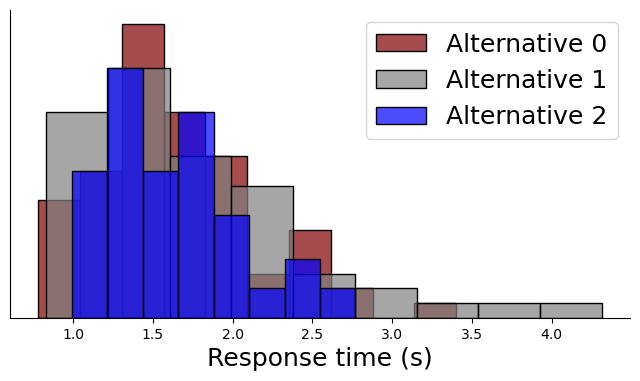

In [93]:
f = visualize_ffi(data2, parameters2, colors=['maroon', 'gray', 'blue'], figsize=(8, 4))

Part 2: Write and document a function that can create pretty visualizations of individual Euler
Maruyama runs (i.e., the internal stochastic process responsible for RT generation in a single
trial)

In [175]:
def simulate_ffi_runs(v, a, x0, tau, alpha, dt=0.001, scale=1., max_time=20.):
    '''
    Simulates one realization of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    v : np.ndarray of shape (N, ), float
        The drift rates.
    a : float
        The boundary separation.
    x0 : np.ndarray of shape (N, ), float 
         Relative starting points.
    tau : float
          Non-decision time (additive constant).
    alpha : float > 0
            The strenth of feedforward inhibition.
    dt : float, optional (default: 1e-3 = 0.001)
         The step size for Euler algorithm.
    scale : float, optional (default: 1.0)
            The scale of the Weiner process. Either 1.0 or 0.1 normally.
    max_time : float, optional (default: 10)
               The maximum number of seconds before forced termination.
            
    Returns:
    --------------
    runs : np.ndarray of shape (_, N), float
           The individual Euler Maruyama runs.
    '''

    #Inits (process starts at a relative starting point)
    assert v.shape[0] == x0.shape[0]
    N = v.size
    x = np.copy(x0)
    rt = tau
    const = scale*np.sqrt(dt)
    runs = []

    #Loop through process and check boundary conditions
    while(rt <= max_time):
        #Sample random noise variate
        z = np.random.randn(N)

        for i in range(N):
            #Perform ffi equation
            I = (alpha / (N - 1)) * (np.sum(v) - v[i])
            dx_i = (v[i] - I)*dt + const*z[i]
            x[i] = max(x[i] + dx_i, 0)
        
        runs.append(np.copy(x))
        #Compute time
        rt += dt

        #Check if decision was reached
        if(any(x >= a)):
            break
                
    #Return runs
    return np.array(runs)

def visualize_ffi_runs(parameters, colors, figsize=(10, 4)):
    '''
    Simulates one realization of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    parameters : dict
                 The parameters for simualating the FFI Model.
    colors : list
             Colors to be used in the visualization.
    figsize : tuple
              The figure size of the matplotlib Figure.
            
    Returns:
    --------------
    f : matplotlib Figure
        The figure to be used for saving.
    '''
    assert parameters['v'].shape[0] == len(colors)
    f, ax = plt.subplots(1, 1, figsize=figsize)

    runs = simulate_ffi_runs(**parameters)
    for i in range(parameters['v'].shape[0]):
        ax.plot(runs.T[i],  color=colors[i], alpha=0.5, label=f'Alternative {i}')
        sns.despine(ax=ax)
        ax.set_title("Euler Maruyama Runs for FFI Model", fontsize=16)
        ax.set_xlabel("Timesteps", fontsize=14)
        ax.set_ylabel("Evidence", fontsize=14)
        ax.legend(fontsize=14)
        f.tight_layout

    return f

In [134]:
parameters = {
    'v': np.array([1., 1., 1.]),
    'a': 2.,
    'x0': np.array([0.001, 0, 0]),
    'tau': 0.5,
    'alpha': 0.5
}

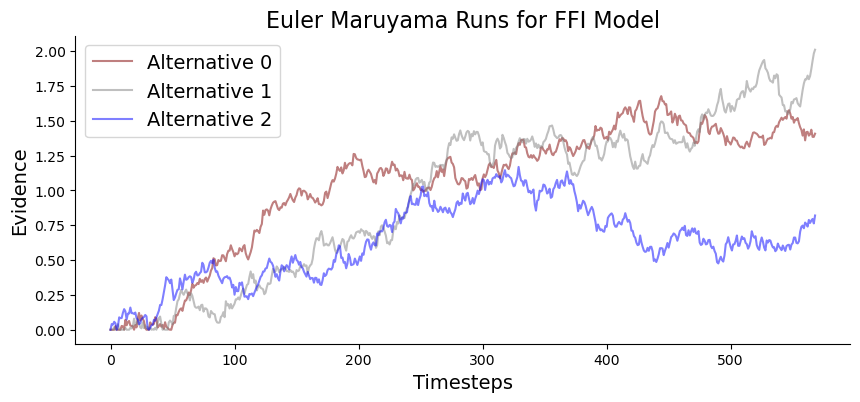

In [177]:
f = visualize_ffi_runs(parameters, colors=['maroon', 'gray', 'blue'], figsize=(10, 4))

Part 3: For a fixed parameter configuration, explore systematically the effect of the feedforward inhibition α parameter on the simulated response time (RT) distributions (e.g., mean RT) and
describe your results.

In [197]:
parameters = {
    'v': np.array([1., 1., 1.]),
    'a': 2.,
    'x0': np.array([0.001, 0, 0]),
    'tau': 0.5,
    'alpha': 0.1
}

In [200]:
alpha = 0.1
mean_rts = []
while(alpha <= 2.5):
    parameters['alpha'] = alpha
    data = simulate_ffi_n(100, **parameters)
    rt = data[:, 0]
    mean_rt = np.mean(rt)
    mean_rts.append(mean_rt)
    print(f'alpha: {round(alpha, 1)}, mean RT: {round(mean_rt, 3)}')
    alpha += 0.2

alpha: 0.1, mean RT: 1.411
alpha: 0.3, mean RT: 1.519
alpha: 0.5, mean RT: 1.711
alpha: 0.7, mean RT: 1.934
alpha: 0.9, mean RT: 2.128
alpha: 1.1, mean RT: 2.496
alpha: 1.3, mean RT: 3.295
alpha: 1.5, mean RT: 4.005
alpha: 1.7, mean RT: 5.381
alpha: 1.9, mean RT: 8.902
alpha: 2.1, mean RT: 10.486
alpha: 2.3, mean RT: 13.912
alpha: 2.5, mean RT: 15.142


<bound method Figure.tight_layout of <Figure size 1000x400 with 1 Axes>>

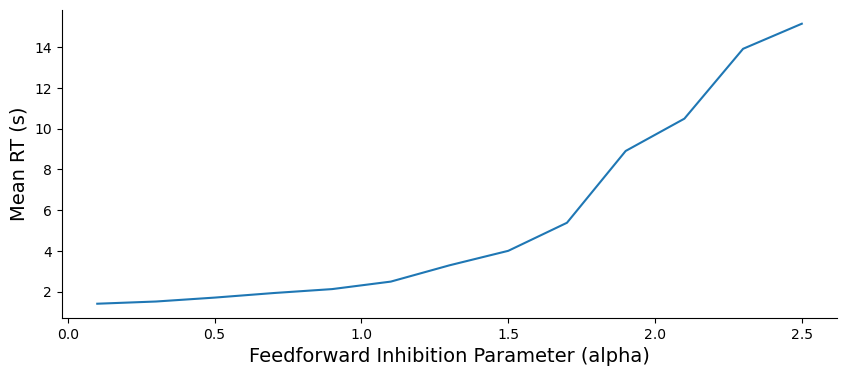

In [211]:
alphas = np.arange(0.1, 2.6, 0.2)
f, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(alphas, mean_rts)
sns.despine()
ax.set_xlabel("Feedforward Inhibition Parameter (alpha)", fontsize=14)
ax.set_ylabel("Mean RT (s)", fontsize=14)
f.tight_layout

We see that as the feedforward inhibition parameter increases, the simulated response time distributions (mean response times) increase. This increase follows an exponential curve until it hits the set maximum response time which will flatten out the tail of the curve.

Bonus: Try to make your simulator efficient using numba or explain in detail where and why
just-in-time compilation fails.

In [238]:
@njit
def simulate_ffi_numba(v, a, x0, tau, alpha, dt=0.001, scale=1., max_time=20.):
    '''
    Simulates one realization of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    v : np.ndarray of shape (N, ), float
        The drift rates.
    a : float
        The boundary separation.
    x0 : np.ndarray of shape (N, ), float 
         Relative starting points.
    tau : float
          Non-decision time (additive constant).
    alpha : float > 0
            The strenth of feedforward inhibition.
    dt : float, optional (default: 1e-3 = 0.001)
         The step size for Euler algorithm.
    scale : float, optional (default: 1.0)
            The scale of the Weiner process. Either 1.0 or 0.1 normally.
    max_time : float, optional (default: 10)
               The maximum number of seconds before forced termination.
            
    Returns:
    --------------
    (y, c) : a tuple of response time (y : float) and a decision (c : int)
    '''

    #Inits (process starts at a relative starting point)
    assert v.shape[0] == x0.shape[0]
    N = v.size
    x = np.copy(x0)
    rt = tau
    const = scale*np.sqrt(dt)

    #Loop through process and check boundary conditions
    while(rt <= max_time):
        #Sample random noise variate
        z = np.random.randn(N)

        for i in range(N):
            #Perform ffi equation
            I = (alpha / (N - 1)) * (np.sum(v) - v[i])
            dx_i = (v[i] - I)*dt + const*z[i]
            x[i] = max(x[i] + dx_i, 0)

        #Compute time
        rt += dt

        #Check if decision was reached
        if(x[0] >= a or x[1] >= a or x[2] >= a ): #change the use of any() to this for njit
            break
                
    #Return result
    return (round(rt, 3), float(x.argmax())) #convert argmax to float for njit

@njit
def simulate_ffi_n_numba(num_sims, v, a, x0, tau, alpha, dt=0.001, scale=1.,max_time=20.):
    '''
    Simulates multiple realizations of the feedforward inhibition process given a set of parameters.

    Parameters:
    --------------
    num_sims : int
               The number of simulations to run.
    v : np.ndarray of shape (N, ), float
        The drift rates.
    a : float
        The boundary separation.
    x0 : np.ndarray of shape (N, ), float 
         Relative starting points.
    tau : float
          Non-decision time (additive constant).
    alpha : float > 0
            The strenth of feedforward inhibition.
    dt : float, optional (default: 1e-3 = 0.001)
         The step size for Euler algorithm.
    scale : float, optional (default: 1.0)
            The scale of the Weiner process. Either 1.0 or 0.1 normally.
    max_time : float, optional (default: 10)
               The maximum number of seconds before forced termination.
            
    Returns:
    --------------
    data : np.ndarray of shape (N, ) containing the result of the simulations
    '''

    data = np.zeros((num_sims, 2))
    for n in range(num_sims):
        data[n, :] = simulate_ffi_numba(v, a, x0, tau, alpha, dt, scale, max_time)
    return data

In [213]:
parameters = {
    'v': [1., 1., 1.],
    'a': 2.,
    'x0': [0.001, 0, 0],
    'tau': 0.5,
    'alpha': 0.1
}

In [243]:
%%time
data = simulate_ffi_n_numba(100, **parameters)

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 19.6 ms


By adding the njit decorators to each function, removing the the use of the any() function which isn't supported with Numba, and changing the argmax to a float so the tuple has 2 floats, I was able to get Numba to work and make the simulator more efficient.